In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline


In [48]:
df = pd.read_csv("fra.csv")
df.tail()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
296,297,Stephen Curry,USA,6,9,Basketball,2020,74.4
297,298,Kevin Durant,USA,7,10,Basketball,2020,63.9
298,299,Tiger Woods,USA,8,11,Golf,2020,62.3
299,300,Kirk Cousins,USA,9,>100,American Football,2020,60.5
300,301,Carson Wentz,USA,10,>100,American Football,2020,59.1


In [49]:
# remove duplicates
df.drop_duplicates(inplace = True)

# drop S.NO
df.drop(columns=['S.NO', 'Name'], inplace = True);

### Null / missing values

In [50]:
df.isnull().sum()

Nationality              0
Current Rank             0
Previous Year Rank      24
Sport                    0
Year                     0
earnings ($ million)     0
dtype: int64

Only missing values are in previous year rank. 

### Data Cleaning 

In [51]:
# make column naming consistent
df.rename(columns={"earnings ($ million)": "Earnings ($ million)"}, inplace = True);

In [52]:
df['Previous Year Rank'].unique()

# will drop this column - data set is chaotic and not useful for analysis

array([nan, '8', '1', '>30', '4', '5', '12', '6', '3', '9', '17', '13',
       '10', '>40', '19', '40', '7', '11', '30', '22', '20', 'not ranked',
       '38', '2', '15', '14', '26', 'none', '18', '>10', '>20', '?', '24',
       '21', '>14', '>100', '??'], dtype=object)

In [53]:
df.drop(columns=['Previous Year Rank'], inplace = True)

In [54]:
df['Sport'].unique()

# need to tidy up this column
# 1. Make lowercase
# 2. Tidy up duplicates
# 3. joint American Football / Baseball entry - needs to be dealt with

array(['boxing', 'auto racing', 'golf', 'basketball', 'Basketball',
       'Boxing', 'Auto Racing', 'Golf', 'Tennis', 'NFL', 'Auto racing',
       'NBA', 'Baseball', 'Ice Hockey', 'American Football / Baseball',
       'tennis', 'ice hockey', 'F1 Motorsports', 'NASCAR', 'Hockey',
       'Auto Racing (Nascar)', 'F1 racing', 'American Football', 'soccer',
       'baseball', 'cycling', 'motorcycle gp', 'Soccer', 'MMA'],
      dtype=object)

In [55]:
df['Sport'] = df['Sport'].str.lower()
df['Sport'].unique()

array(['boxing', 'auto racing', 'golf', 'basketball', 'tennis', 'nfl',
       'nba', 'baseball', 'ice hockey', 'american football / baseball',
       'f1 motorsports', 'nascar', 'hockey', 'auto racing (nascar)',
       'f1 racing', 'american football', 'soccer', 'cycling',
       'motorcycle gp', 'mma'], dtype=object)

In [56]:
# nfl goes under american football, and nba goes under basketball, so need to replace these values
df['Sport'].replace('nfl', 'american football', inplace = True)
df['Sport'].replace('nba', 'basketball', inplace = True)

# auto racing has many values 
df['Sport'].replace(['auto racing (nascar)', 'nascar', 'f1 motorsports', 'f1 racing'], 'auto racing', inplace = True)

In [57]:
# recapitalise sports names as appropriate

df['Sport'] = df['Sport'].str.title()
df['Sport'].replace('Mma', 'Mma'.upper(), inplace = True)
df['Sport'].replace('Motorcycle Gp', 'Motorcycle GP', inplace = True)
df['Sport'].unique()

array(['Boxing', 'Auto Racing', 'Golf', 'Basketball', 'Tennis',
       'American Football', 'Baseball', 'Ice Hockey',
       'American Football / Baseball', 'Hockey', 'Soccer', 'Cycling',
       'Motorcycle GP', 'MMA'], dtype=object)

In [63]:
df['Nationality'].unique()

# Filipino should come under Philippines
df['Nationality'].replace('Filipino', 'Philippines', inplace = True)

# Dominican should be Dominica
df['Nationality'].replace('Dominican', 'Dominica', inplace = True)

Will leave the "American Football / Baseball" as its own special category, since changing this would have an impact on the rest of the analysis. 

## Onto the EDA!

In [64]:
df.columns

Index(['Nationality', 'Current Rank', 'Sport', 'Year', 'Earnings ($ million)'], dtype='object')

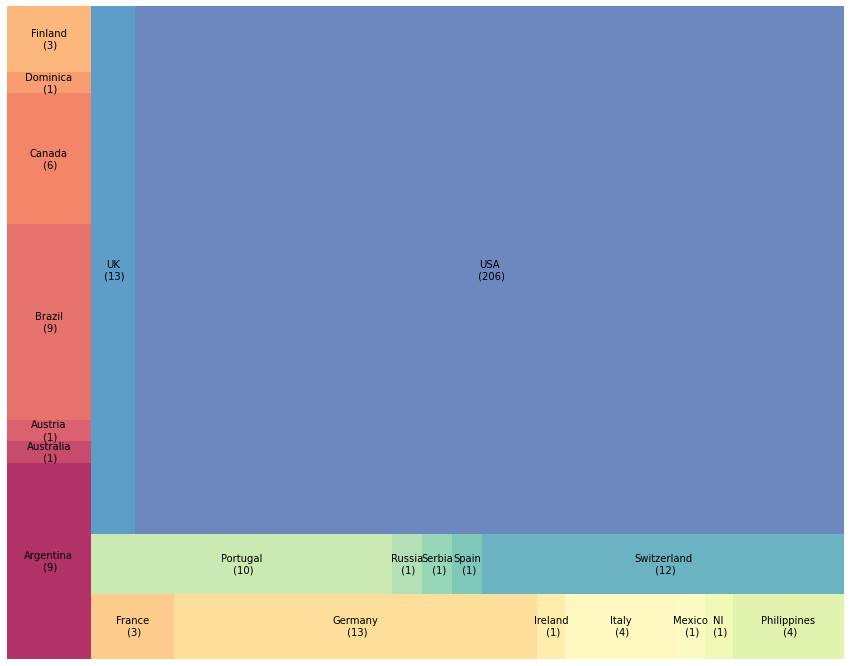

In [198]:
import squarify

countries = df.groupby('Nationality').size().reset_index(name = "counts")
countries.replace("Northern Ireland", "NI", inplace = True) # Northern Ireland is too long and makes it hard to read other labels

labels = countries.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = countries['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(15,12))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.axis('off')
plt.show()

In [101]:
df.Nationality.nunique()

21

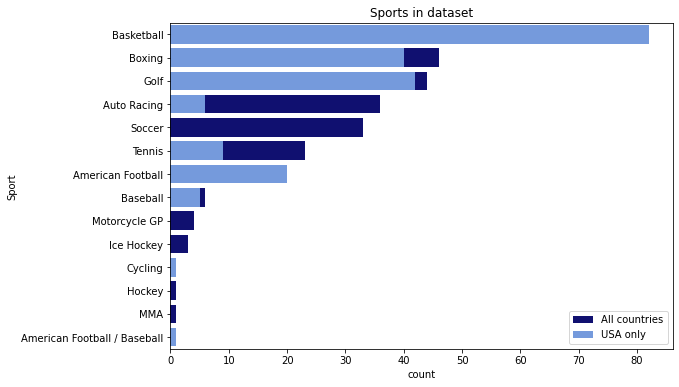

In [162]:
fig = plt.figure(figsize=(9,6))
ax = sns.countplot(data=df, y = 'Sport', order = df['Sport'].value_counts().index, color = 'navy', label = "All countries")
ax.set(title = "Sports in dataset")
#plt.xticks(rotation=90);

# US only 
USA = df[df['Nationality'] == "USA"]
sns.countplot(data = USA, y = 'Sport', order = df['Sport'].value_counts().index, color = 'cornflowerblue', label = "USA only")
plt.legend(loc = 'lower right')

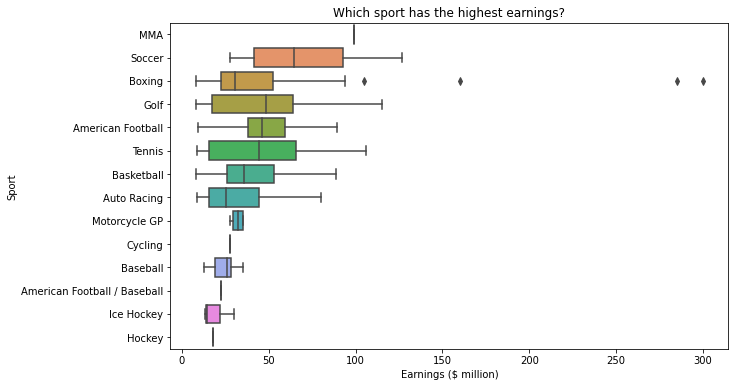

In [200]:
#want in descending order
sports_ = df.groupby('Sport')['Earnings ($ million)'].mean().sort_values(ascending = False).reset_index()
sports_order = sports_['Sport'].tolist()

# plot figure
fig = plt.figure(figsize=(10,6))
ax = sns.boxplot(data=df, y = 'Sport', x = "Earnings ($ million)", order = sports_order)
ax.set(title = "Which sport has the highest earnings?");

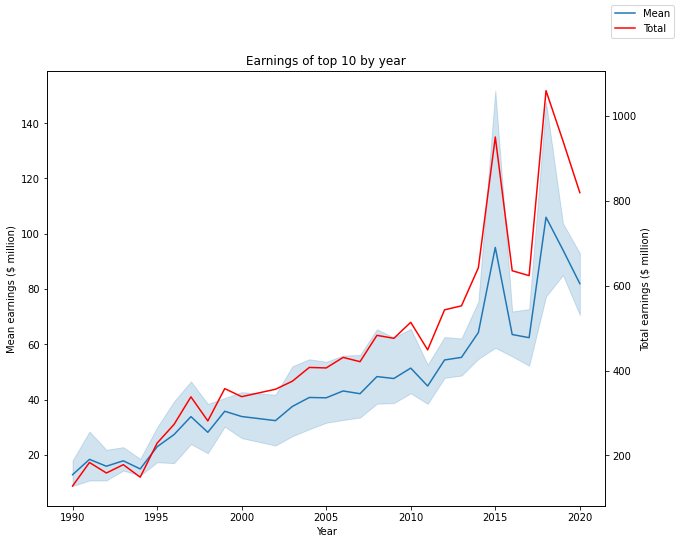

In [225]:
year_ = df.groupby('Year')['Earnings ($ million)'].mean()
year_sum = df.groupby('Year')['Earnings ($ million)'].sum()

# plot figure
fig = plt.figure(figsize=(10,8))
ax1 = sns.lineplot(data=df, x = 'Year', y = "Earnings ($ million)", label = "Mean", legend = False)
ax1.set(title = "Earnings of top 10 by year", ylabel = "Mean earnings ($ million)");
ax2 = plt.twinx()
ax2.set(ylabel = 'Total earnings ($ million)')
sns.lineplot(year_sum, ax = ax2, color = "r", label = "Total", legend = False)
fig.legend()

The total earnings follow the mean quite closely.

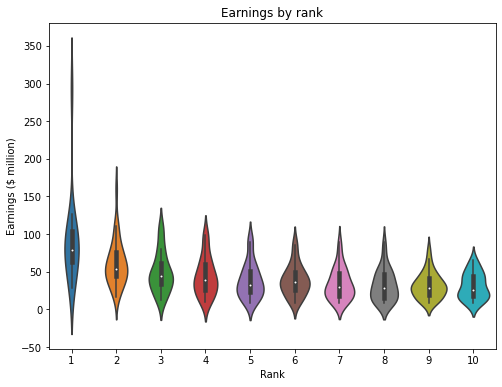

In [221]:
# could group by rank and compare earnings? - violinplot or barplot

fig = plt.figure(figsize=(8,6))
ax = sns.violinplot(data = df, x = "Current Rank", y = "Earnings ($ million)")
ax.set(title = "Earnings by rank", xlabel = "Rank");

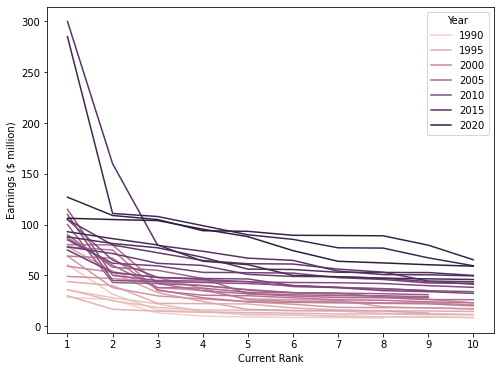

In [242]:
# lineplot of rank earnings (hue = Year)

fig = plt.figure(figsize=(8,6))
ax = sns.lineplot(data = df, x = "Current Rank", y = "Earnings ($ million)", hue = "Year")
plt.xticks(np.arange(1, 11, 1));

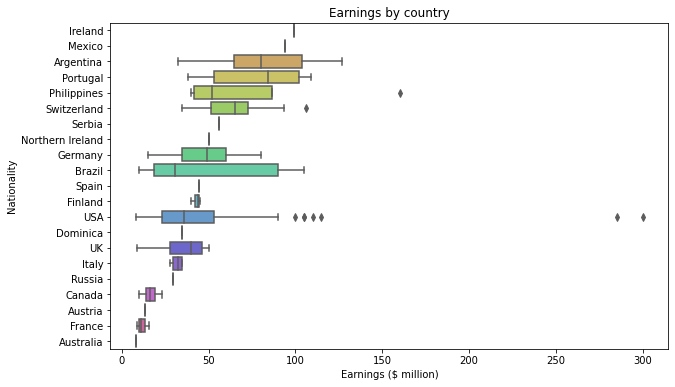

In [201]:
# earnings by nationality?
# mean earnings since USA has the greatest number by far

#want in descending order
nat_ = df.groupby('Nationality')['Earnings ($ million)'].mean().sort_values(ascending = False).reset_index()
nat_order = nat_['Nationality'].tolist()

# plot figure
fig = plt.figure(figsize=(10,6))
ax = sns.boxplot(data=df, y = 'Nationality', x = "Earnings ($ million)", order = nat_order, palette = "hls")
ax.set(title = "Earnings by country");